In [ ]:
import torch
from google.colab import drive

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
drive.mount('/content/drive')

Using device: cuda
Mounted at /content/drive


In [ ]:
import re

with open('/content/drive/MyDrive/truyenkieu.txt', 'r', encoding='utf-8') as f:
  text = f.read()
print(text[:90])
print()
print(''.join(sorted(set(text))))

Trăm năm trong cõi người ta,
Chữ tài chữ mệnh khéo là ghét nhau.
Trải qua một cuộc bể dâu,


 !"',.:;?ABCDEGHKLMNOPQRSTUVXYabcdeghiklmnopqrstuvxyÀÁÂÉÊÔàáâãèéêìíòóôõùúýĂăĐđĩũƠơƯưạảẤấẦầẩẫậắằẳẵặẹẻẽếềểễệỉịọỏốồổỗộớờỞởỡợụủứừửữựỳỷỹ


In [ ]:
from collections import Counter

cleaned_text = re.sub(r'[!"\',.:;?]', '', text).lower()
vocab = Counter(cleaned_text)
print(f'Num chars: {len(cleaned_text)}')
print(f'Num chars excluding space: {len(cleaned_text) - vocab[' ']}')
print(f'Num unique chars: {len(vocab)}')
print(f'Unique chars: {sorted(vocab.keys())}')

Num chars: 100531
Num chars excluding space: 81007
Num unique chars: 90
Unique chars: ['\n', ' ', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'à', 'á', 'â', 'ã', 'è', 'é', 'ê', 'ì', 'í', 'ò', 'ó', 'ô', 'õ', 'ù', 'ú', 'ý', 'ă', 'đ', 'ĩ', 'ũ', 'ơ', 'ư', 'ạ', 'ả', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ẹ', 'ẻ', 'ẽ', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ỉ', 'ị', 'ọ', 'ỏ', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'ụ', 'ủ', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'ỳ', 'ỷ', 'ỹ']


In [ ]:
num_words = vocab[' '] + vocab['\n'] + 1
num_lines = vocab['\n'] + 1
print(f'Num words: {num_words}')
print(f'Num lines: {num_lines}')
print(f'Avg chars per word: {len(cleaned_text) / num_words}')
print(f'Avg chars per line: {len(cleaned_text) / num_lines}')

Num words: 22778
Num lines: 3254
Avg chars per word: 4.4135130388971815
Avg chars per line: 30.89459127228027


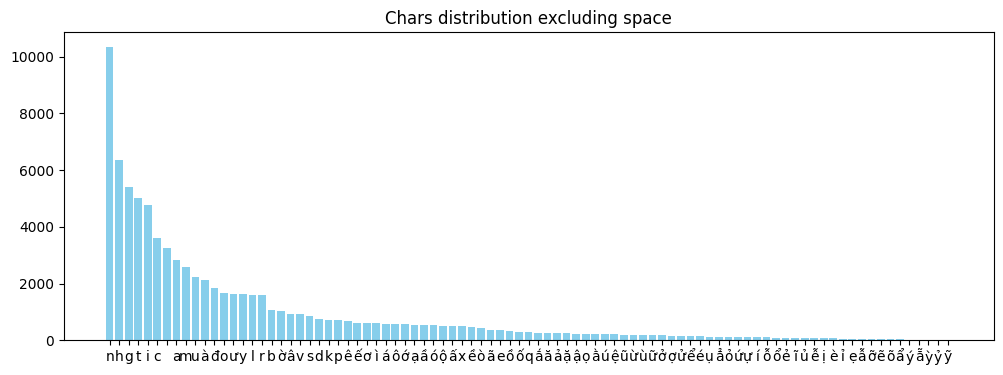

In [ ]:
import matplotlib.pyplot as plt

char, count = zip(*vocab.most_common()[1:])
plt.figure(figsize=(12, 4))
plt.title("Chars distribution excluding space")
plt.bar(char, count, color='skyblue')
plt.show()

In [ ]:
NUM_SAMPLES = 20

print(f'Top {NUM_SAMPLES} most common chars:')
char_row = "".join(f"{repr(c)[1:-1]:>6}" for c in char[:NUM_SAMPLES])
count_row = "".join(f"{n:>6}" for n in count[:NUM_SAMPLES])
print(char_row)
print(count_row)
print()

print(f'Top {NUM_SAMPLES} least common chars:')
char_row = "".join(f"{repr(c)[1:-1]:>6}" for c in char[-NUM_SAMPLES:])
count_row = "".join(f"{n:>6}" for n in count[-NUM_SAMPLES:])
print(char_row)
print(count_row)

Top 20 most common chars:
     n     h     g     t     i     c    \n     a     m     u     à     đ     o     ư     y     l     r     b     ờ     â
 10341  6371  5413  5032  4788  3605  3253  2821  2573  2218  2127  1851  1667  1633  1629  1610  1601  1076  1020   918

Top 20 least common chars:
     ỗ     ổ     ẻ     ĩ     ủ     ễ     ị     è     ỉ     ẹ     ẫ     ỡ     ẽ     õ     ẩ     ý     ẵ     ỳ     ỷ     ỹ
   101    96    92    89    86    81    79    68    62    56    50    50    45    42    41    29    27    25     8     2


In [ ]:
BATCH_SIZE = 32
BLOCK_SIZE = 32
DROPOUT = 0.1

In [ ]:
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms


stoi = {c: i for i, c in enumerate(vocab)}
itos = {i: c for i, c in enumerate(vocab)}
def encode(text): return [stoi[c] for c in text]
def decode(out): return ''.join(itos[i] for i in out)

class TextDataset(Dataset):
  def __init__(self, text, blocksize):
    self.data = torch.tensor(encode(text))
    self.blocksize = blocksize

  def __len__(self): return len(self.data) - self.blocksize

  def __getitem__(self, idx):
    x = self.data[idx : idx+self.blocksize]
    y = self.data[idx+1 : idx+self.blocksize + 1]
    return x, y

dataset = TextDataset(cleaned_text, BLOCK_SIZE)

total_count = len(dataset)
train_count = int(0.8 * total_count)
test_count = total_count - train_count
train_dataset, test_dataset = random_split(dataset, [train_count, test_count])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

x_sample, y_sample = next(iter(train_loader))
print(f"Batch Shape: {tuple(x_sample.shape)}")
print(f"Label Shape: {tuple(y_sample.shape)}")

Batch Shape: (32, 32)
Label Shape: (32, 32)


In [ ]:
import torch.nn as nn
from torch.nn import functional as F


class Block(nn.Module):
  def __init__(self, n_embd, n_head):
    super().__init__()
    self.sa = nn.MultiheadAttention(n_embd, n_head, dropout=DROPOUT, batch_first=True)
    self.ffwd = nn.Sequential(
      nn.Linear(n_embd, 4 * n_embd),
      nn.ReLU(),
      nn.Linear(4 * n_embd, n_embd),
      nn.Dropout(DROPOUT)
    )
    self.ln1 = nn.LayerNorm(n_embd)
    self.ln2 = nn.LayerNorm(n_embd)

  def forward(self, x):
    B, T, C = x.shape
    mask = torch.triu(torch.ones(T, T) * float('-inf'), diagonal=1).to(x.device)
    x_ln = self.ln1(x)
    x = x + self.sa(x_ln, x_ln, x_ln, attn_mask=mask)[0]
    x = x + self.ffwd(self.ln2(x))
    return x

class GPTModel(nn.Module):
  def __init__(self, vocab_size, block_size, n_embd=64, n_head=4, n_layer=4):
    super().__init__()
    self.tok_emb = nn.Embedding(vocab_size, n_embd)
    self.pos_emb = nn.Embedding(block_size, n_embd)
    self.blocks = nn.Sequential(*[Block(n_embd, n_head) for _ in range(n_layer)])
    self.ln_f = nn.LayerNorm(n_embd)
    self.lm_head = nn.Linear(n_embd, vocab_size)
    self.blocksize = block_size

  def forward(self, idx):
    B, T = idx.shape
    tok_emb = self.tok_emb(idx)
    pos_emb = self.pos_emb(torch.arange(T, device=device))
    x = tok_emb + pos_emb
    x = self.blocks(x)
    x = self.ln_f(x)
    logits = self.lm_head(x)
    return logits

  def generate(self, idx, max_new_tokens):
    for _ in range(max_new_tokens):
      idx_cond = idx[:, -self.blocksize:]
      logits = self(idx_cond)

      logits = logits[:, -1, :]
      probs = F.softmax(logits, dim=-1)
      idx_next = torch.multinomial(probs, num_samples=1)
      idx = torch.cat((idx, idx_next), dim=1)
    return idx

model = GPTModel(len(vocab), BLOCK_SIZE).to(device)
model = torch.compile(model)

In [ ]:
import torch.optim as optim


learning_rate = 1e-3
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

EPOCHS = 200

model.train()
for epoch in range(EPOCHS):
  total_loss = 0
  for step, (x_batch, y_batch) in enumerate(train_loader):
    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)
    logits = model(x_batch)

    B, T, C = logits.shape
    loss = F.cross_entropy(logits.view(B*T, C), y_batch.view(B*T))

    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()

  avg_loss = total_loss / len(train_loader)
  print(f"Epoch {epoch+1}'s Loss: {avg_loss:.4f}")

/usr/local/lib/python3.12/dist-packages/torch/backends/cuda/__init__.py:131: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  return torch._C._get_cublas_allow_tf32()
W0119 11:59:06.243000 1301 torch/_inductor/utils.py:1558] [0/0] Not enough SMs to use max_autotune_gemm mode


Epoch 1's Loss: 1.8664
Epoch 2's Loss: 1.6170
Epoch 3's Loss: 1.5228
Epoch 4's Loss: 1.4436
Epoch 5's Loss: 1.3799
Epoch 6's Loss: 1.3309
Epoch 7's Loss: 1.2920
Epoch 8's Loss: 1.2609
Epoch 9's Loss: 1.2347
Epoch 10's Loss: 1.2119
Epoch 11's Loss: 1.1940
Epoch 12's Loss: 1.1768
Epoch 13's Loss: 1.1620
Epoch 14's Loss: 1.1492
Epoch 15's Loss: 1.1373
Epoch 16's Loss: 1.1271
Epoch 17's Loss: 1.1170
Epoch 18's Loss: 1.1084
Epoch 19's Loss: 1.1008
Epoch 20's Loss: 1.0935
Epoch 21's Loss: 1.0867
Epoch 22's Loss: 1.0804
Epoch 23's Loss: 1.0743
Epoch 24's Loss: 1.0698
Epoch 25's Loss: 1.0652
Epoch 26's Loss: 1.0591
Epoch 27's Loss: 1.0545
Epoch 28's Loss: 1.0506
Epoch 29's Loss: 1.0469
Epoch 30's Loss: 1.0441
Epoch 31's Loss: 1.0399
Epoch 32's Loss: 1.0371
Epoch 33's Loss: 1.0337
Epoch 34's Loss: 1.0305
Epoch 35's Loss: 1.0285
Epoch 36's Loss: 1.0252
Epoch 37's Loss: 1.0228
Epoch 38's Loss: 1.0206
Epoch 39's Loss: 1.0191
Epoch 40's Loss: 1.0164
Epoch 41's Loss: 1.0144
Epoch 42's Loss: 1.0124
E

In [ ]:
def generate_text(model, prompt_str, max_new_tokens=200):
  model.eval()
  input_ids = encode(prompt_str)
  idx = torch.tensor([input_ids], dtype=torch.long).to(device)

  with torch.no_grad():
    generated_idx = model.generate(idx, max_new_tokens=max_new_tokens)

  output_str = decode(generated_idx[0].tolist())
  return output_str

print(generate_text(model, "một màu"))

một màu ngẩn tơ ngơ dây
lửa hương chốn nồi hẳn tròn cho kỳ
nh non hỏi bán mình góc thay
nỗi nhà viên cho ván đi
mà lòng phiếu những nực cờ nghe nghề
phơ mười rậm gác non thành tran châu
bấy giờ mới rõ tăm hơ


In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/GPT_Model.pth')